In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from veros.setups.acc_variable_res_quarter_no_params import ACCResQNPSetup
import matplotlib.pyplot as plt
from veros import VerosSetup, veros_routine
from veros.variables import allocate, Variable
from veros.core.operators import numpy as npx, update, at


Importing core modules
 Using computational backend numpy on cpu
 Runtime settings are now locked



In [3]:
simulation = ACCResQNPSetup()
simulation.setup()

Running model setup
Initializing streamfunction method
Computing ILU preconditioner...
 Solving for boundary contribution by island 0
 Solving for boundary contribution by island 1
 Running diagnostic "averages" every 10.0 minutes
 Writing output for diagnostic "averages" every 1.0 years
 Running diagnostic "energy" every 10.0 minutes
 Writing output for diagnostic "energy" every 10.0 minutes
 Writing output for diagnostic "acc_monitor" every 10.0 minutes
Reading restart data from acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param_post_spinup_50000.restart.h5


In [8]:
file_nrj_spinup1 = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param.energy.nc')
file_nrj_spinup2 = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param_rerun.energy.nc')

In [26]:

# compare here the energy/avg/ACC transport time series to the ones provided in the repo
# make sure you loaded the last restart file so that you can see the BSF anomaly
file_avg = nc.Dataset('acc_runs/acc_simulation_quarter/acc_simulation_quarter_post_spinup.averages.nc')
file_nrj = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param_post_spinup.energy.nc')
file_acc_diags = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param_post_spinup.acc_diags.nc')


In [19]:
file_nrj = nc.Dataset('acc_runs/acc_simulation_quarter/acc_simulation_quarter_post_spinup.energy.nc')
#file_nrj_postspinup = nc.Dataset('acc_runs/acc_simulation_quarter/acc_simulation_quarter.energy.nc')
#plt.plot(file_nrj.variables['Time'][:],file_nrj.variables['k_m'][:])


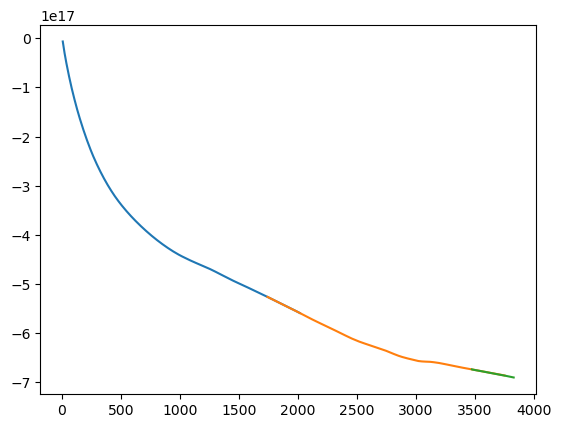

In [9]:
plt.plot(file_nrj_spinup1.variables['Time'][:],file_nrj_spinup1.variables['tke_m'][:])
plt.plot(file_nrj_spinup2.variables['Time'][:],file_nrj_spinup2.variables['tke_m'][:])
plt.plot(file_nrj.variables['Time'][:],file_nrj.variables['tke_m'][:])
plt.show()


(1, 324, 248)

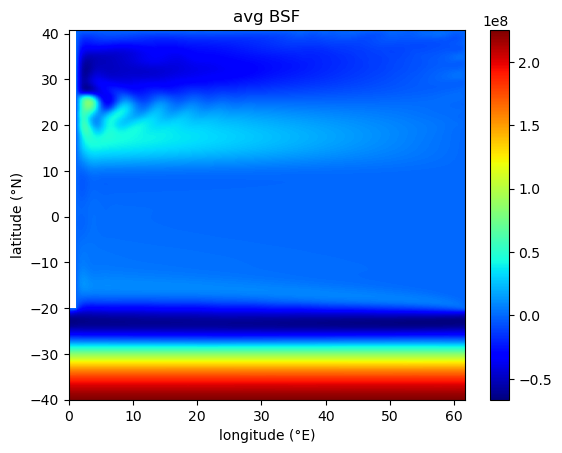

In [27]:
# plot averages:
# BSF
xt = file_avg.variables['xu'][:]
yt = file_avg.variables['yu'][:]
zt = file_avg.variables['zw'][:]

# Define the extent of the plot
extent = [xt.min(), xt.max(), yt.min(), yt.max()]
psi_mean = file_avg.variables['psi'][:].mean(axis = 0)
# Display the image with the specified extent
plt.imshow(psi_mean, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('longitude (°E)')
plt.ylabel('latitude (°N)')
plt.title('avg BSF')
plt.show()

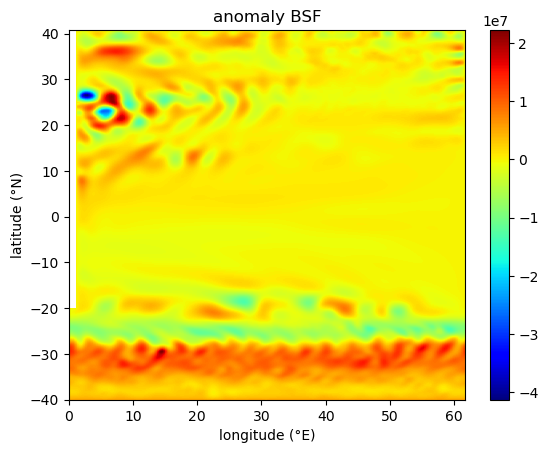

In [28]:
psi_mean = file_avg.variables['psi'][:].mean(axis = 0)
psi_snapshot = simulation.state.variables.psi[2:-2,2:-2,0].T
# Display the image with the specified extent
plt.imshow(psi_snapshot - psi_mean, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('longitude (°E)')
plt.ylabel('latitude (°N)')
plt.title('anomaly BSF')
plt.show()

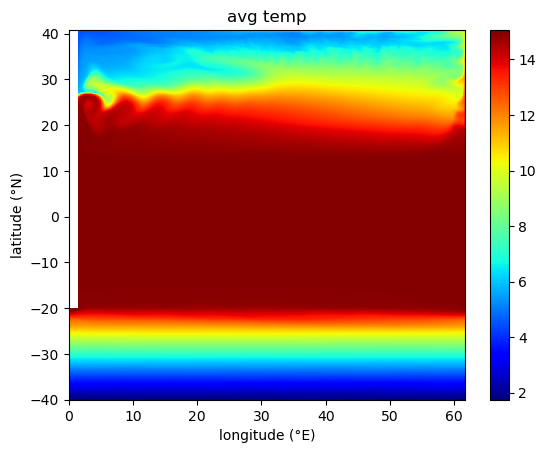

In [29]:

# temperature

temp_mean = file_avg.variables['temp'][:,-1,:,:].mean(axis = 0)
# Display the image with the specified extent
plt.imshow(temp_mean, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('longitude (°E)')
plt.ylabel('latitude (°N)')
plt.title('avg temp')
plt.show()


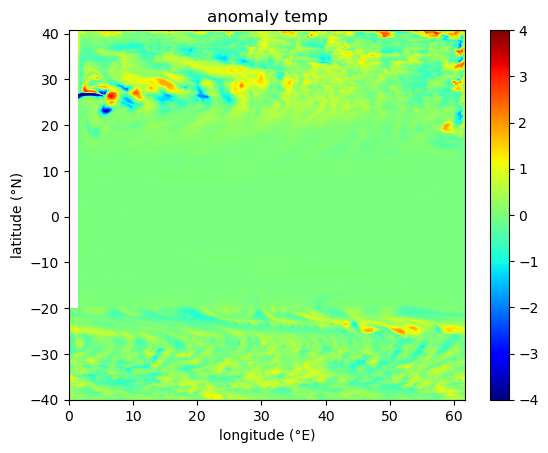

In [31]:
temp_snapshot = simulation.state.variables.temp[2:-2,2:-2,-1, 0].T
# Display the image with the specified extent
plt.imshow(temp_snapshot - temp_mean, cmap='jet', extent=extent, origin='lower', aspect='auto', vmin = -4, vmax = 4)
plt.colorbar()
plt.xlabel('longitude (°E)')
plt.ylabel('latitude (°N)')
plt.title('anomaly temp')
plt.show()

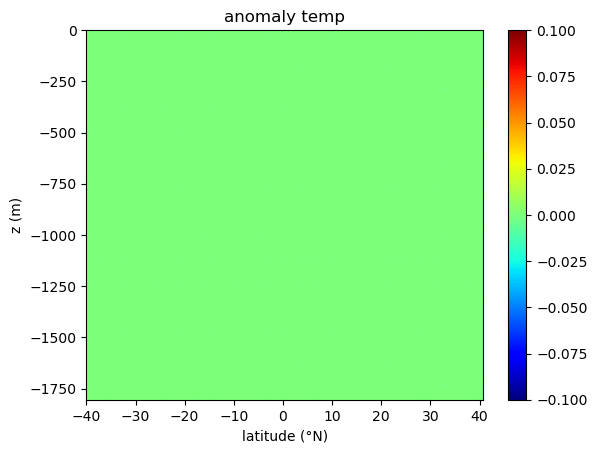

In [17]:
# Zonal mean temperature
temp_zonal_mean_avg = file_acc_diags.variables['temp_zonal_mean'][:].mean(axis = 0)

temp_zonal_mean_avg2 = file_avg.variables['temp'][:].mean(axis = -1).mean(axis = 0)
extent = [yt.min(), yt.max(), zt.min(), zt.max()]

plt.imshow(temp_zonal_mean_avg, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('latitude (°N)')
plt.ylabel('z (m)')
plt.title('anomaly temp')
plt.show()


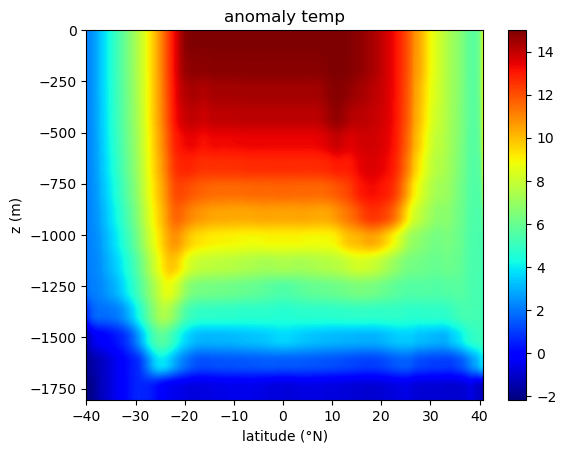

In [18]:

plt.imshow(temp_zonal_mean_avg2, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('latitude (°N)')
plt.ylabel('z (m)')
plt.title('anomaly temp')
plt.show()

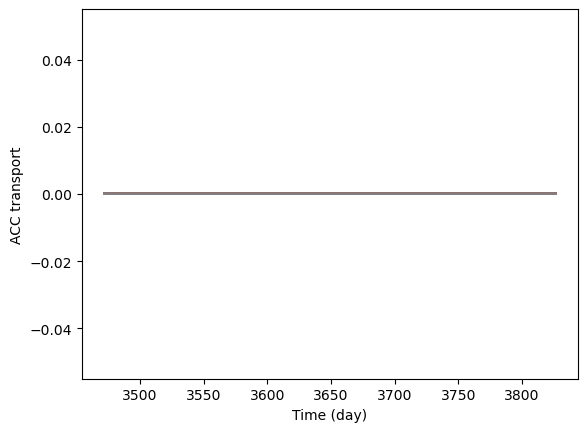

In [19]:
# acc transport
plt.plot(file_acc_diags.variables['Time'][:],file_acc_diags.variables['flux_north_south'][:])
plt.xlabel('Time (day)')
plt.ylabel('ACC transport')
plt.show()


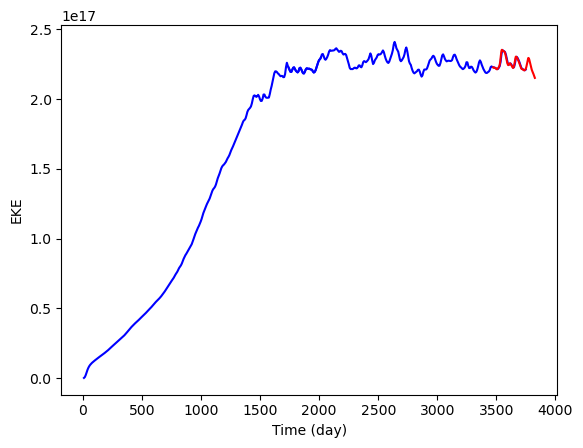

In [22]:

# acc transport
plt.plot(file_nrj_spinup1.variables['Time'][:],file_nrj_spinup1.variables['eke_m'][:], 'b')
plt.plot(file_nrj_spinup2.variables['Time'][:],file_nrj_spinup2.variables['eke_m'][:], 'b')
plt.plot(file_nrj.variables['Time'][:],file_nrj.variables['eke_m'][:], 'r')
plt.xlabel('Time (day)')
plt.ylabel('EKE')
plt.show()

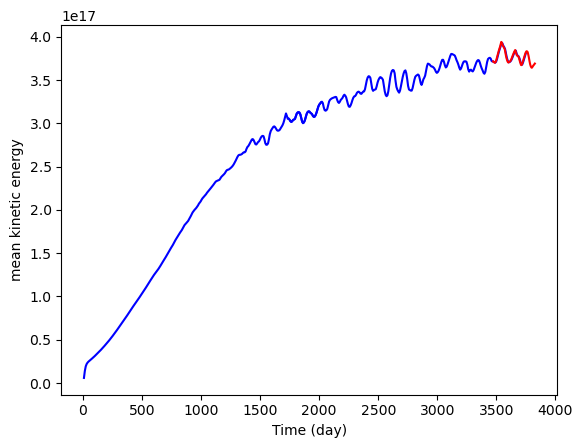

In [24]:

# acc transport
plt.plot(file_nrj_spinup1.variables['Time'][:],file_nrj_spinup1.variables['k_m'][:], 'b')
plt.plot(file_nrj_spinup2.variables['Time'][:],file_nrj_spinup2.variables['k_m'][:], 'b')
plt.plot(file_nrj.variables['Time'][:],file_nrj.variables['k_m'][:], 'r')
plt.xlabel('Time (day)')
plt.ylabel('mean kinetic energy')
plt.show()

In [25]:
file_nrj.variables['k_m']

<class 'netCDF4._netCDF4.Variable'>
float64 k_m(Time)
    _FillValue: -1e+18
    long_name: Mean kinetic energy
    units: J
unlimited dimensions: Time
current shape = (50970,)
filling on

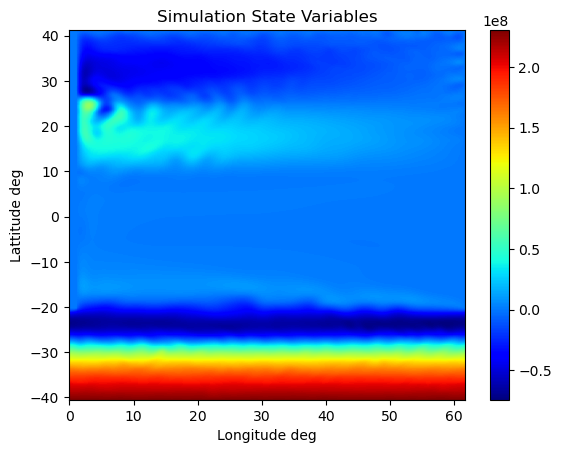

In [13]:
# Define the extent of the plot
extent = [simulation.state.variables.xu.min(), simulation.state.variables.xu.max(), simulation.state.variables.yu.min(), simulation.state.variables.yu.max()]
psi_slice = simulation.state.variables.psi[:,:,0] * simulation.state.variables.maskZ[:,:,0]
# Display the image with the specified extent
plt.imshow(psi_slice[2:-2,2:-2].T, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('Longitude deg')
plt.ylabel('Lattitude deg')
plt.title('Simulation State Variables')
plt.show()

In [20]:
simulation.state.variables.temp.mean(axis = 0).shape

(252, 328, 15, 3)

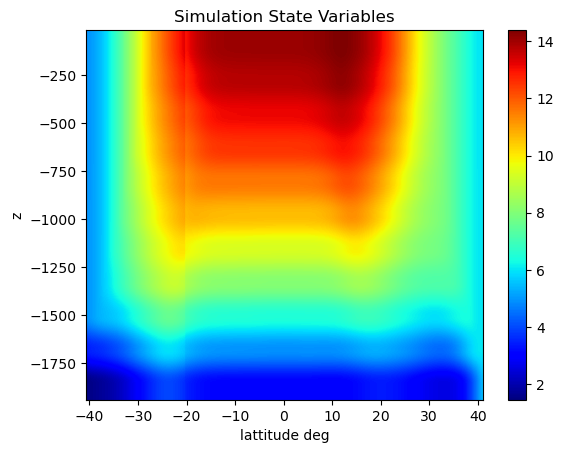

In [32]:
# Define the extent of the plot
extent = [simulation.state.variables.yt.min(), simulation.state.variables.yt.max(), simulation.state.variables.zt.min(), simulation.state.variables.zt.max()]

# Display the image with the specified extent
plt.imshow(simulation.state.variables.temp.mean(axis = 0)[2:-2,2:-2,0].T, cmap='jet', extent=extent, origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('lattitude deg')
plt.ylabel('z')
plt.title('Simulation State Variables')
plt.show()

# Analysis of energy files 

In [2]:
vm_nrj = nc.Dataset('acc_runs/acc_simulation_quarter/acc_simulation_quarter.energy.nc')
vm_nrj2 = nc.Dataset('acc_runs/acc_simulation_quarter/acc_simulation_quarter_rerun.energy.nc')

In [4]:
vm_nrjNP = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param.energy.nc')
vm_nrjNP2 = nc.Dataset('acc_runs/acc_simulation_quarter_no_param/acc_simulation_quarter_no_param_rerun.energy.nc')

In [35]:
vm_nrj.variables.keys()

dict_keys(['xt', 'xu', 'yt', 'yu', 'zt', 'zw', 'tensor1', 'tensor2', 'isle', 'Time', 'k_m', 'Hd_m', 'eke_m', 'iw_m', 'tke_m', 'dE_tot_m', 'dk_m', 'dHd_m', 'deke_m', 'diw_m', 'dtke_m', 'ke_diss_m', 'Hd_diss_m', 'eke_diss_m', 'iw_diss_m', 'tke_diss_m', 'adv_diss_m', 'wind_m', 'dHd_sources_m', 'iw_forc_m', 'tke_forc_m', 'ke_hd_m', 'ke_tke_m', 'ke_iw_m', 'tke_hd_m', 'ke_eke_m', 'hd_eke_m', 'eke_tke_m', 'eke_iw_m', 'cabb_m', 'cabb_iso_m'])

Text(0, 0.5, 'Mean kinetic energy ')

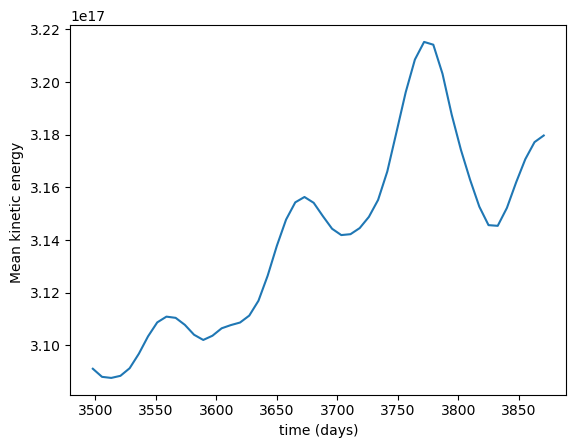

In [14]:
#plt.plot(vm_nrj.variables['Time'][-500:],vm_nrj.variables['k_m'][-500:])
plt.plot(vm_nrj2.variables['Time'][-50:],vm_nrj2.variables['k_m'][-50:])

plt.xlabel("time (days)")
plt.ylabel("Mean kinetic energy ")

Text(0, 0.5, 'Mean kinetic energy ')

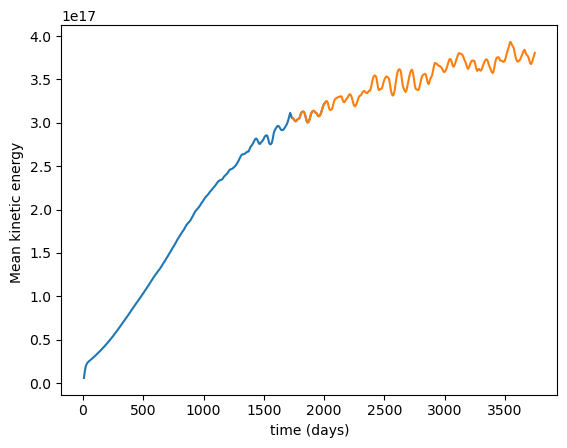

In [6]:
plt.plot(vm_nrjNP.variables['Time'][:],vm_nrjNP.variables['k_m'][:])
plt.plot(vm_nrjNP2.variables['Time'][:],vm_nrjNP2.variables['k_m'][:])

plt.xlabel("time (days)")
plt.ylabel("Mean kinetic energy ")

Text(0, 0.5, 'Turbulent kinetic energy ')

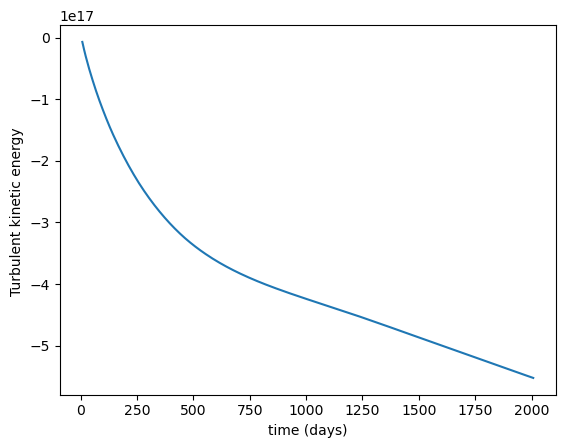

In [7]:
plt.plot(vm_nrj.variables['Time'][:],vm_nrj.variables['tke_m'][:])
plt.xlabel("time (days)")
plt.ylabel("Turbulent kinetic energy ")

Text(0, 0.5, 'Meso-scale eddy energy')

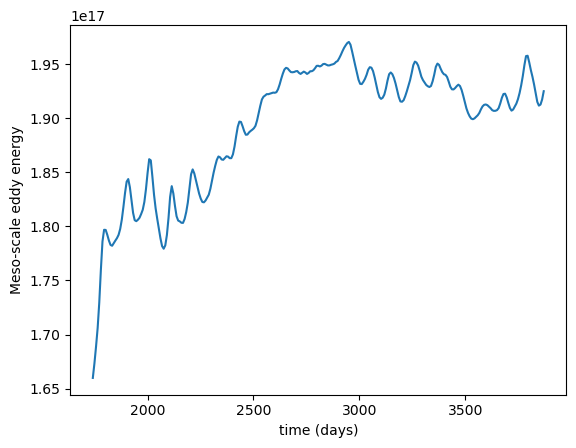

In [10]:
plt.plot(vm_nrj2.variables['Time'][:],vm_nrj2.variables['eke_m'][:])
plt.xlabel("time (days)")
plt.ylabel("Meso-scale eddy energy")

In [50]:
vm_nrj.variables['eke_m']

<class 'netCDF4._netCDF4.Variable'>
float64 eke_m(Time)
    _FillValue: -1e+18
    long_name: Meso-scale eddy energy
    units: J
unlimited dimensions: Time
current shape = (182,)
filling on

In [54]:
simulation.state.variables.dHd

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+0